In [1]:
import utils
import gradcam 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from keras.initializers import glorot_uniform
from PIL import Image
import os

In [3]:
from keras.preprocessing import image
from keras.applications import inception_v3 as inc_net


In [4]:
from utils import  preprocess_image, show_imgwithheat
from gradcam import grad_cam,grad_cam_plus

In [5]:
import glob

In [7]:
# img.shape

(480, 640, 3)

In [8]:
def open_images(inference_folder: str) -> np.ndarray:
    """Loads images from a folder and prepare them for inferencing.

    Parameters
    ----------
    inference_folder : str
        Location of images for inferencing.

    Returns
    -------
    np.ndarray
        List of images as numpy arrays transformed to fit the efficient_net model input specs.
    """
    images = []
    for img in os.listdir(inference_folder):
        img_location = os.path.join(inference_folder, img)  # create full path to image

        with Image.open(img_location) as img:  # open image with pillow

            img = np.array(img)
            img = img[:, :, :3]
            img = np.expand_dims(img, axis=0)  # add 0 dimension to fit input shape of efficient_net
            img = inc_net.preprocess_input(img)

        images.append(img)
    images_array = np.vstack(images)/2+0.5# combine images efficiently to a numpy array
    return images_array

In [58]:
images = open_images("C:/Users/Ketan/Thesis/self-driving-car/challenges/test_dataset1")


In [59]:
img_path = 'C:/Users/Ketan/Thesis/self-driving-car/challenges/test_dataset1/1479425442982805056.jpg'
img = preprocess_image(img_path)

In [9]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model



In [10]:
model = keras.models.load_model('C:/Users/Ketan/Thesis/self-driving-car/challenges/tl_regression_resized_udacity_v4.h5', compile=False)


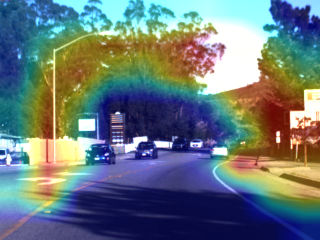

In [60]:
heatmap = grad_cam(model, images, layer_name = 'conv5_block3_out',
#                    label_name = ['0','1', '2', '3','4','5','6','7','8','9'],
                   #category_id = 0,
                   )
# plt.savefig('C:/Users/Ketan/Thesis/self-driving-car/challenges/explanations_resized/custom_classification_GradCAM/1479425577406411560.jpg', dpi=300)
show_imgwithheat(img_path, heatmap, return_array = False)



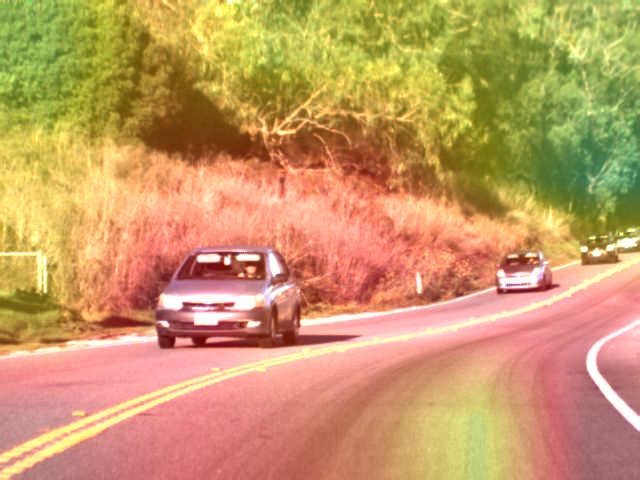

In [79]:
heatmap_plus = grad_cam_plus(model, img,layer_name = 'conv2d_2')
show_imgwithheat(img_path, heatmap_plus)

In [61]:
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

# train set / data 
x_train = x_train.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)


170500096/170498071 [==============================] - 50s 0us/step


In [62]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)